In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def x_k_and_y_k(k, n):
    x_k = -5 + k * (10 / n)
    y_k = 1 / (1 + x_k ** 2)
    return x_k, y_k


N = 1000

# Полином Лагранжа

In [3]:
def lagrange_polynom(n, x, y, t):
    P_n = np.vectorize(lambda t: np.sum([y[i] * (np.prod([t - x[j] for j in range(n+1) if j != i]) / np.prod([x[i] - x[j] for j in range(n+1) if j != i])) for i in range(n+1)]))(t)
    return P_n

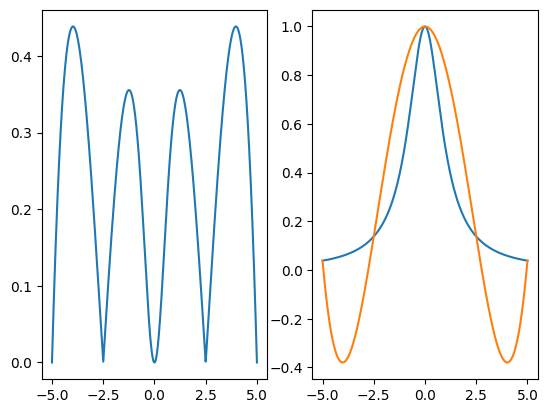

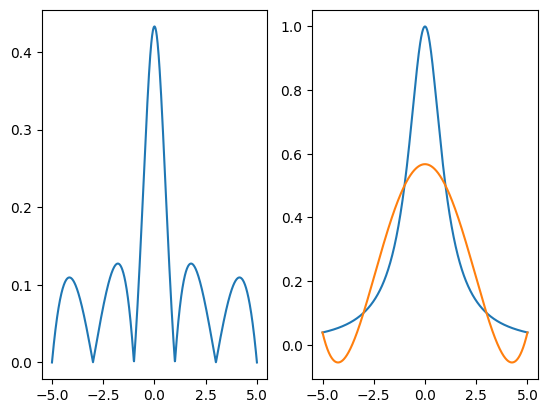

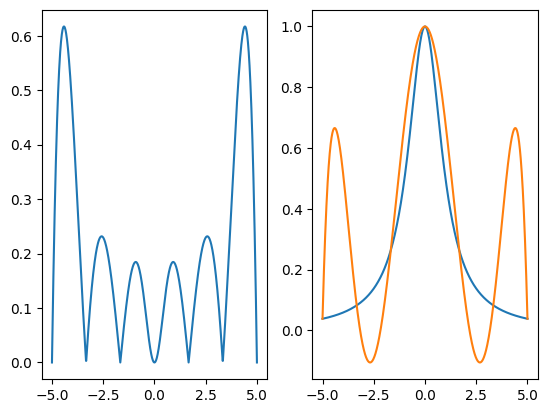

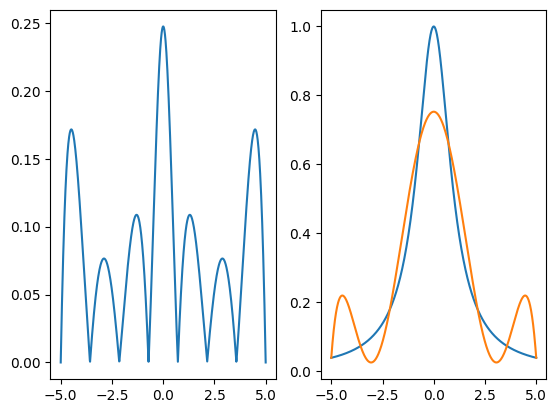

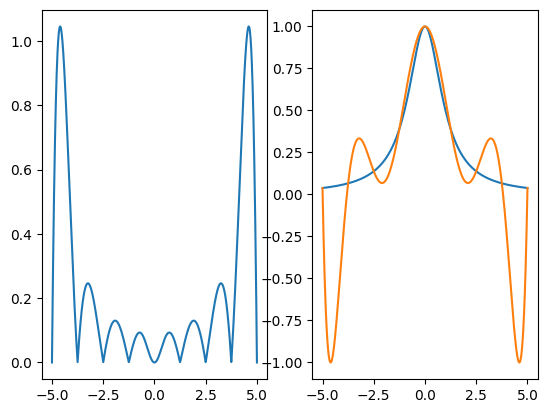

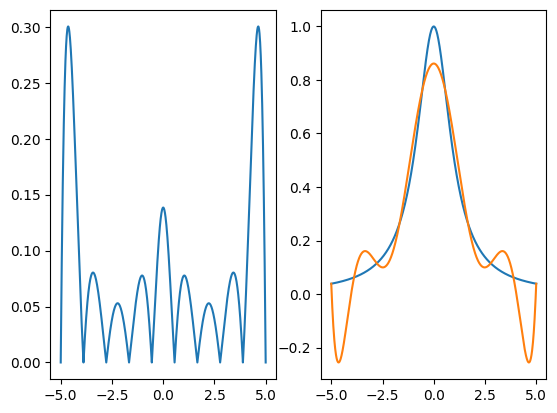

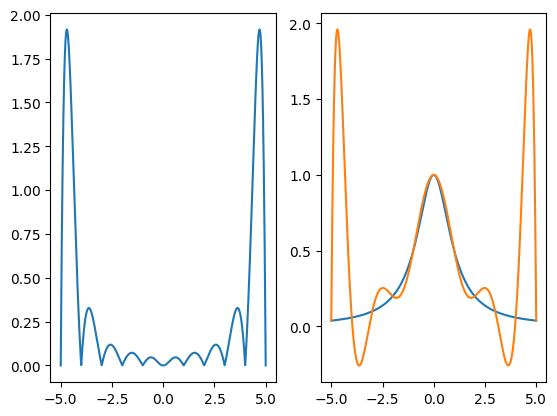

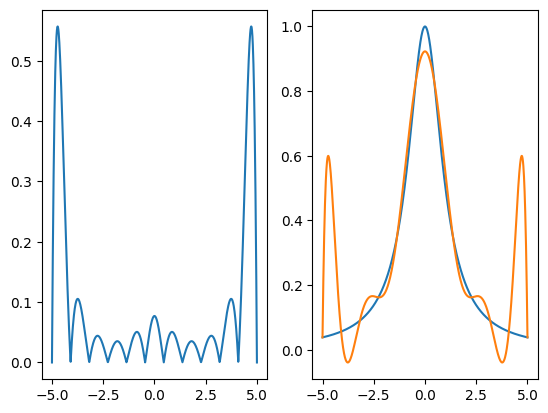

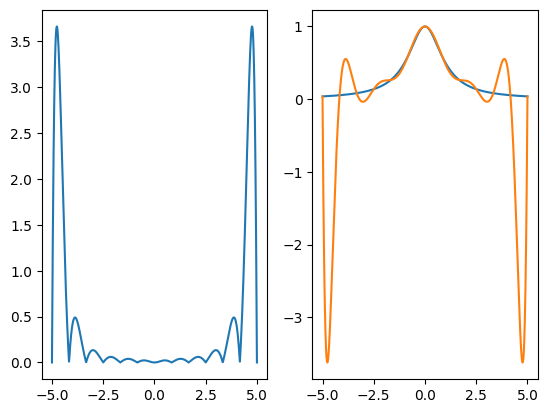

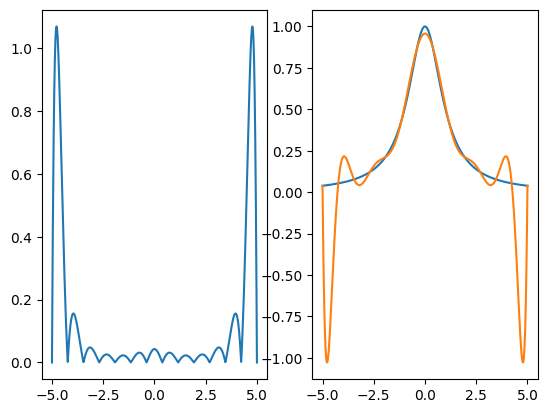

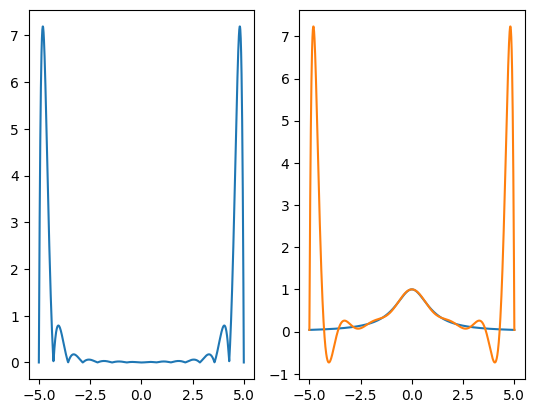

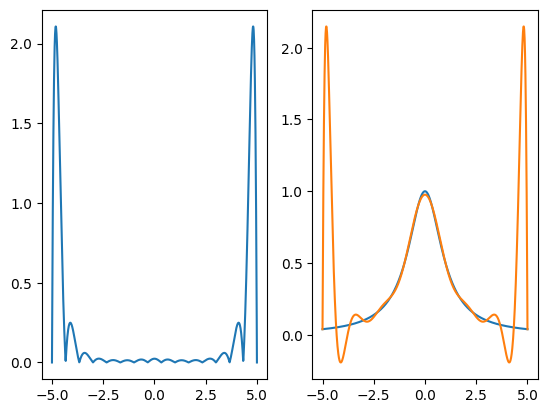

In [4]:
for n in range(4, 16):
    x = np.array([x_k_and_y_k(i, n)[0] for i in range(n+1)])
    y = np.array([x_k_and_y_k(i, n)[1] for i in range(n+1)])
    t = np.linspace(x[0], x[-1], N)
    plt.subplot(1,2,1)
    plt.plot(t, np.abs(lagrange_polynom(n, x, y, t) - np.vectorize(lambda x: 1 / (1 + x ** 2))(t)))
    plt.subplot(1,2,2)
    plt.plot(t, np.vectorize(lambda x: 1 / (1 + x ** 2))(t))
    plt.plot(t, lagrange_polynom(n,x,y,t))
    plt.show()

# Полином Ньютона

In [5]:
def coef(x, y):
    n = len(x)
    a = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])
    return np.array(a)


def newton_polynom(X, Y, t):
    a = coef(X,Y)
    n = len(a) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( t - X[i] ) + a[i]
    return temp

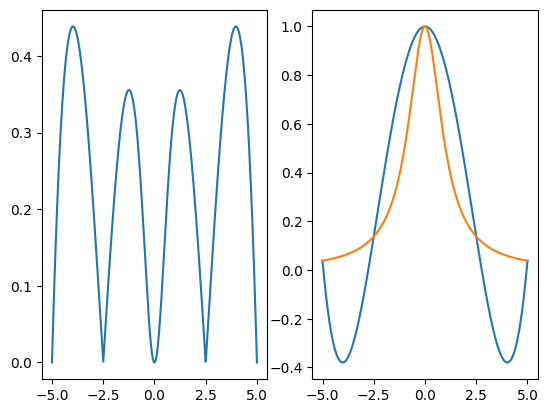

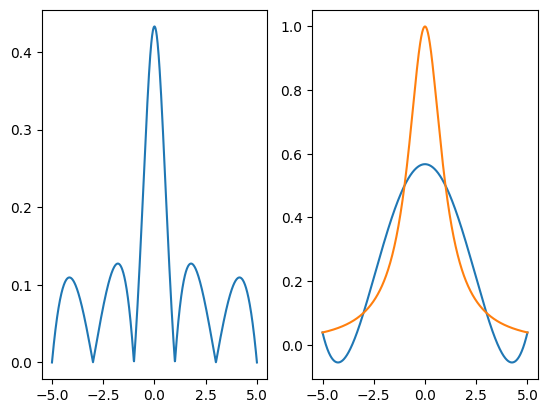

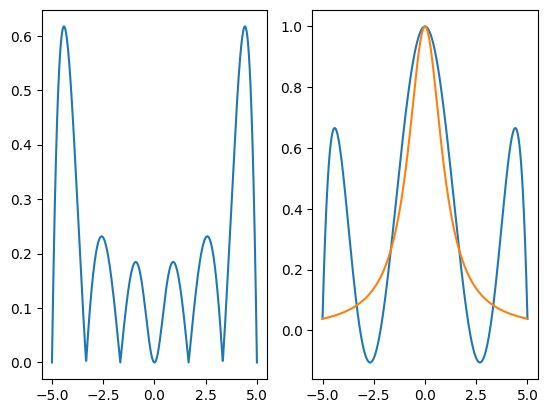

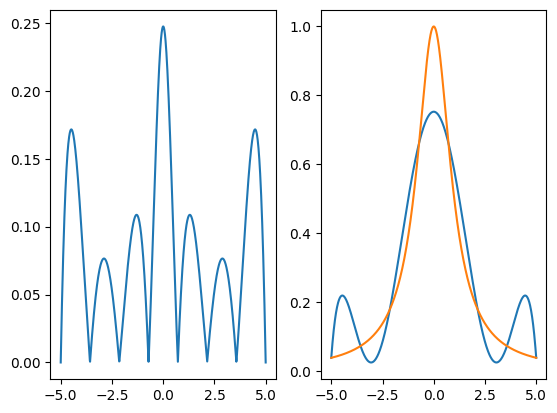

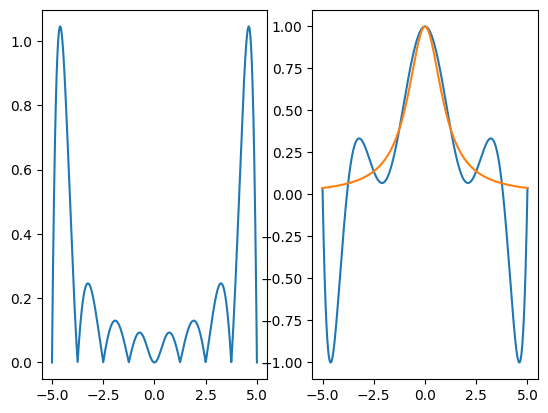

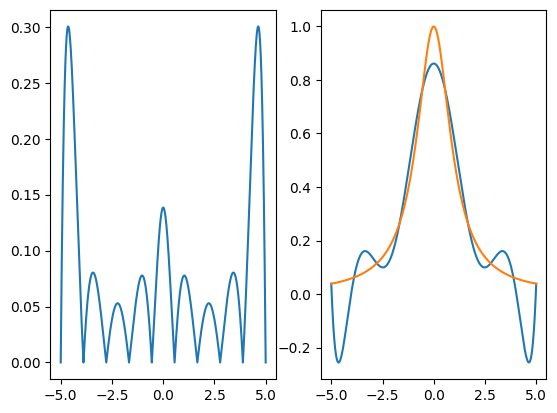

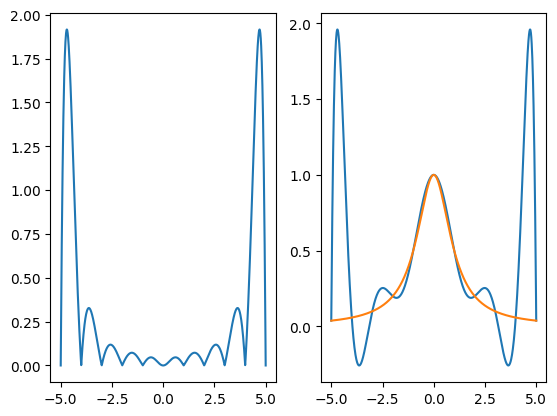

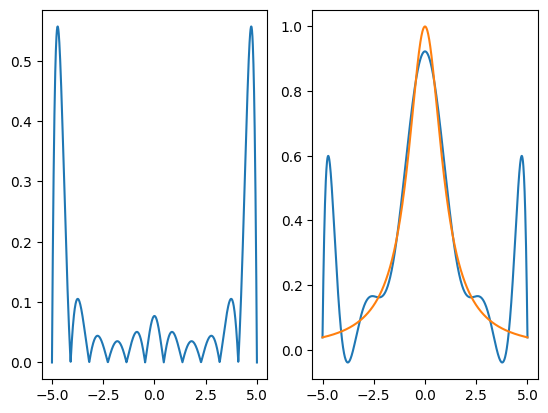

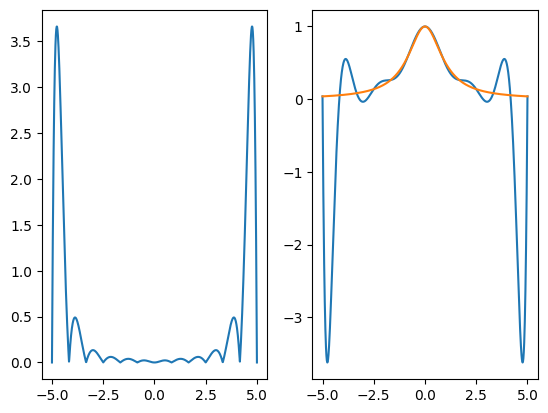

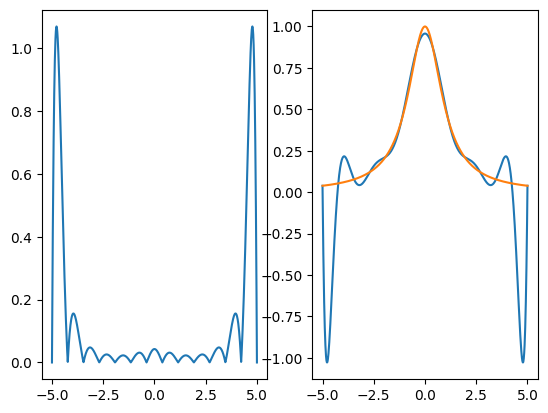

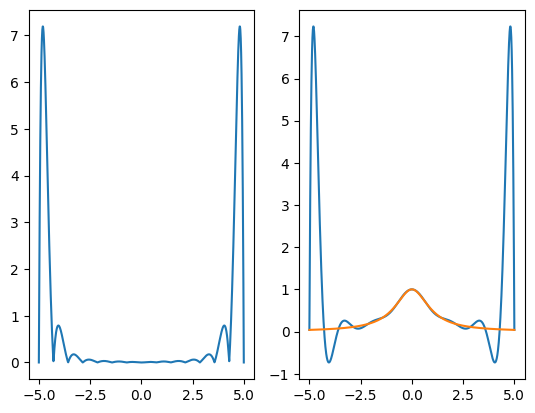

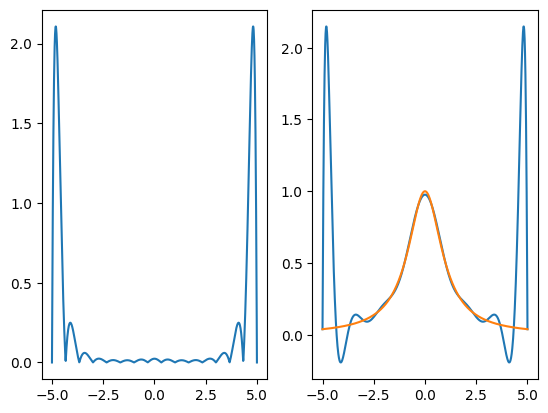

In [6]:
for n in range(4, 16):
    x = np.array([x_k_and_y_k(i, n)[0] for i in range(n+1)])
    y = np.array([x_k_and_y_k(i, n)[1] for i in range(n+1)])
    t = np.linspace(x[0], x[-1], N)
    plt.subplot(1,2,1)
    plt.plot(t, np.abs(newton_polynom(x, y, t) - np.vectorize(lambda x: 1 / (1 + x ** 2))(t)))
    plt.subplot(1,2,2)
    plt.plot(t, newton_polynom(x, y, t))
    plt.plot(t, np.vectorize(lambda x: 1 / (1 + x ** 2))(t))
    plt.show()